In [1]:
import os
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
path = os.path.join('./creditcard.csv')
df = pd.read_csv(path)
# Оставляем в датафрейме наиболее важные фичи
# df = df[['V17','V12','V14','V10','V11','V16','V18','V9','Class']]назы
df = df.drop(['Amount','Time'],axis=1)

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


* Разделим датасет на тестовую и тренировочную выборку

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1], df.iloc[:,-1], test_size=0.22,
    random_state=42, stratify=df.iloc[:,-1])

In [5]:
df_train = pd.concat([X_train, y_train], axis=1)


* Появилась идея, что можно на время убрать из датасета строки с классом '1'.
* После этого можно будет провести обычный отбор фичей, и очистку датасета от выбросов
* Если первый пункт не выполнить, то тогда в датасете останется очень мало объектов с классом '1', или не останется вовсе. Так дизбаланс классов станет еще более явным

In [6]:
# создадим отдельный датафрейм, в который запишем все объекты с классом 1
df_class_fraud = df_train[(df_train.Class == 1)]
# создадим отдельный датафрейм, в который запишем все объекты с классом 0
df_class_norm = df_train[df_train.Class == 0]
# создадим датафрейм в котором не будет параметра класс
X = df.drop(['Class'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

* Далее будем производить очистку 
* Использую 2 способа борьбы с аномалиями, для этого создам 2 версии датасета: для одного и другого способа.

In [7]:
def quantile(df_cut, X):
    for i in X.columns:
        a = df_cut[i].quantile(0.25)
        b = df_cut[i].quantile(0.75)
        df_cut = df_cut[(df_cut[i] > a - 1.5 * (b - a)) & (df_cut[i] < b + 1.5 * (b - a))]
    return df_cut
        

def mean_std(df_cut, X):
    for i in X.columns:
        left_side = df_cut[i].mean() - 5 * df_cut[i].std()
        right_side = df_cut[i].mean() + 5 * df_cut[i].std()

        df_cut = df_cut[(df_cut[i] > left_side) & (df_cut[i] < (right_side))]
    return df_cut
# df_cut.info(), df_cut['Class'].value_counts()

In [8]:
# создадим 2 версии датафрейма, каждую из них почистим от выбросов конкретным методом
df_class_norm_quantile = df_class_norm
df_class_norm_mean_std = df_class_norm

In [9]:
l = 3 
while l !=0:
    first_value = df_class_norm_quantile.shape[0]
    df_class_norm_quantile = quantile(df_class_norm_quantile, X)
    second_value = df_class_norm_quantile.shape[0]
    l = first_value - second_value
df_class_norm_quantile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35117 entries, 39153 to 29062
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      35117 non-null  float64
 1   V2      35117 non-null  float64
 2   V3      35117 non-null  float64
 3   V4      35117 non-null  float64
 4   V5      35117 non-null  float64
 5   V6      35117 non-null  float64
 6   V7      35117 non-null  float64
 7   V8      35117 non-null  float64
 8   V9      35117 non-null  float64
 9   V10     35117 non-null  float64
 10  V11     35117 non-null  float64
 11  V12     35117 non-null  float64
 12  V13     35117 non-null  float64
 13  V14     35117 non-null  float64
 14  V15     35117 non-null  float64
 15  V16     35117 non-null  float64
 16  V17     35117 non-null  float64
 17  V18     35117 non-null  float64
 18  V19     35117 non-null  float64
 19  V20     35117 non-null  float64
 20  V21     35117 non-null  float64
 21  V22     35117 non-null  float64

<AxesSubplot: >

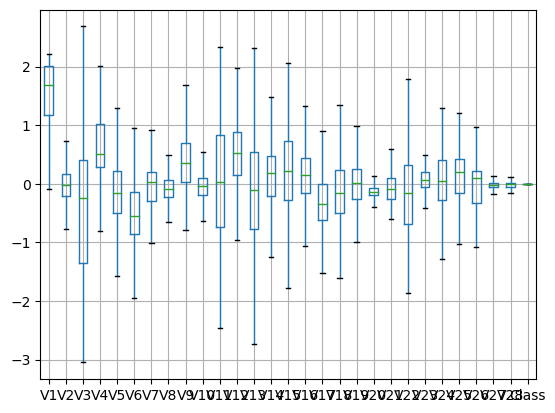

In [10]:
df_class_norm_quantile.boxplot(column=[x for x in df_class_norm_quantile.columns])


In [11]:
df_train.Class.value_counts()

0    221765
1       384
Name: Class, dtype: int64

In [12]:
sns.scatterplot(data=df_train, x='V14', y='V17', hue='Class')

<AxesSubplot: xlabel='V14', ylabel='V17'>

In [13]:
l = 3 
while l !=0:
    first_value = df_class_norm_mean_std.shape[0]
    df_class_norm_mean_std = mean_std(df_class_norm_mean_std, X)
    second_value = df_class_norm_mean_std.shape[0]
    l = first_value - second_value
df_class_norm_mean_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201898 entries, 39153 to 17677
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      201898 non-null  float64
 1   V2      201898 non-null  float64
 2   V3      201898 non-null  float64
 3   V4      201898 non-null  float64
 4   V5      201898 non-null  float64
 5   V6      201898 non-null  float64
 6   V7      201898 non-null  float64
 7   V8      201898 non-null  float64
 8   V9      201898 non-null  float64
 9   V10     201898 non-null  float64
 10  V11     201898 non-null  float64
 11  V12     201898 non-null  float64
 12  V13     201898 non-null  float64
 13  V14     201898 non-null  float64
 14  V15     201898 non-null  float64
 15  V16     201898 non-null  float64
 16  V17     201898 non-null  float64
 17  V18     201898 non-null  float64
 18  V19     201898 non-null  float64
 19  V20     201898 non-null  float64
 20  V21     201898 non-null  float64
 21  V22    

In [14]:

df_class_norm_mean_std.boxplot(column=['V17','V12','V14','V10','V11','V16','V18','V9'])


<AxesSubplot: xlabel='V14', ylabel='V17'>

* Соединим наши датасеты в тренировочный датасет

In [15]:
# # Сначала попробуем датасет почищеный методом квартилей
# df_train = pd.concat([df_class_fraud, df_class_norm_quantile], axis=0)
# from sklearn.utils import shuffle
# df_train = shuffle(df_train)
# X_train = df_train.iloc[:,:-1]
# y_train = df_train.iloc[:,-1]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [16]:
# Теперь методом среднего и отклонения
df_train = pd.concat([df_class_fraud, df_class_norm_mean_std], axis=0)
from sklearn.utils import shuffle
df_train = shuffle(df_train)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((202282, 28), (202282,), (62658, 28), (62658,))

In [17]:
# X_train = X_train.loc[:,['V14','V17']]
# X_test = X_test.loc[:,['V14','V17']]
# y_train.value_counts()

In [18]:
# clf = DecisionTreeClassifier(max_depth=3)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [19]:
# clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
#     max_depth=1, random_state=0)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [20]:
# clf = RandomForestClassifier(max_depth=3)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [21]:
import sklearn.externals
import joblib

In [22]:
# Обучение модели
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train, y_train)

# Сохранение модели
filename = 'knn_model.sav'
joblib.dump(model, filename)



['knn_model.sav']

In [23]:
# Загрузка сохраненной модели
loaded_model = joblib.load(filename)

In [35]:
y_pred.value_counts()

0    62539
1      119
dtype: int64

In [38]:
# Использование загруженной модели для предсказания
y_pred = loaded_model.predict_proba(X_test)


In [44]:
y_test.index

Int64Index([268252, 218752,  38670, 146891, 155412,  48526, 239719,  82586,
            164144, 170636,
            ...
             45752,  99705,  46929, 225567, 271765,  55902, 134432, 145925,
            178923, 211870],
           dtype='int64', length=62658)

In [46]:
y_pred = pd.DataFrame(pd.DataFrame(y_pred, index=y_test.index).iloc[:,-1])
y_pred

,1
268252,0.0
218752,0.0
38670,0.0
146891,0.0
155412,0.0
...,...
55902,0.0
134432,0.0
145925,0.0
178923,0.0


In [48]:
pd.concat([y_test,y_pred],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62658 entries, 268252 to 211870
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   62658 non-null  int64  
 1   1       62658 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.4 MB


In [25]:
# pd.concat([y_test, y_pred)

In [26]:
new_df = pd.DataFrame()
new_df['Class'] = pd.DataFrame(y_test)
# pd.DataFrame(y_test)
y_pred.shape, y_test.shape

((62658, 1), (62658,))

In [27]:
new_df['Prob'] = y_pred
y_pred.value_counts(), y_test.value_counts()

(0    62539
 1      119
 dtype: int64,
 0    62550
 1      108
 Name: Class, dtype: int64)

In [28]:
new_df


,Class,Prob
268252,0,NaN
218752,0,NaN
38670,0,0.0
146891,0,NaN
155412,0,NaN
...,...,...
55902,0,0.0
134432,0,NaN
145925,0,NaN
178923,0,NaN


In [29]:
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[62517,    33],
       [   22,    86]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62550
           1       0.72      0.80      0.76       108

    accuracy                           1.00     62658
   macro avg       0.86      0.90      0.88     62658
weighted avg       1.00      1.00      1.00     62658



In [32]:
import graphviz
dot_data = clf.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['0','1'], 
                                filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

AttributeError: 'KNeighborsClassifier' object has no attribute 'export_graphviz'